In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/6033f0b2-48e7-411c-a39b-86297f412c19___RS_LB 4020.JPG
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/66473aff-3438-4a8c-8c05-5fed8a4255ae___RS_LB 4473.JPG
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/00000080.jpg
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/34f42d6e-6e09-46cb-800b-5da5fdb5e8b8___RS_Early.B 8110.JPG
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/00000113.jpg
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/68f056c9-4989-4809-b597-3739ff66afc3___RS_Early.B 8748.JPG
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/4babadaf-7d3f-4cc8-8179-05d86893dd97___Crnl_L.Mold 9096.JPG
/kaggle/input/waste-segregation-image-dataset/Dataset/val/biodegradable/leaf_waste/9badd590-45ed-4636-9590-

In [2]:
import os
import pandas as pd
from fastai.vision.all import *
from fastai.vision.widgets import *
from sklearn.metrics import classification_report

In [3]:
!pip install -Uqq fastai

In [4]:
path = Path('/kaggle/input/waste-segregation-image-dataset/Dataset/train')
path.ls()

(#2) [Path('/kaggle/input/waste-segregation-image-dataset/Dataset/train/biodegradable'),Path('/kaggle/input/waste-segregation-image-dataset/Dataset/train/non_biodegradable')]

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
#function to get the full label
def get_full_label(file_path):
    # Extract the child and parent folder names
    return f"{file_path.parts[-2]}/{file_path.parts[-3]}"  # Get 'food_waste' and 'category_bio/non-bio'

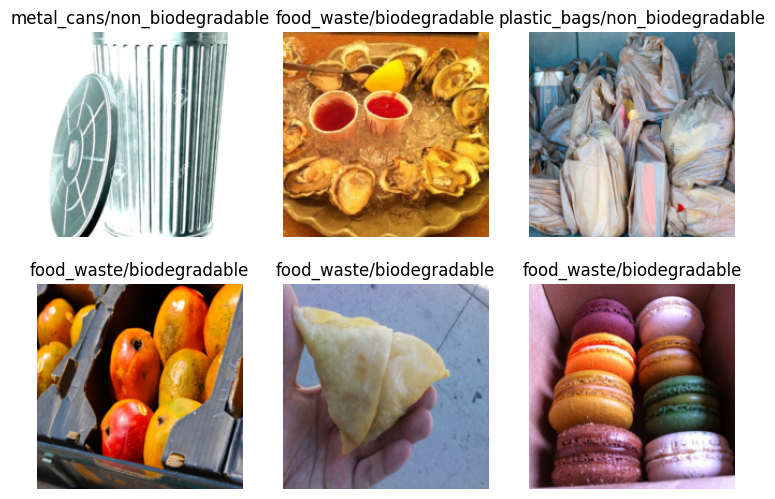

In [7]:
train_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,       
    splitter=RandomSplitter(valid_pct=0.2, seed = 42),
    get_y=get_full_label,
    item_tfms=[Resize(192, method='squish')]
)

dls = train_datablock.dataloaders(path, bs = 32)
dls.show_batch(max_n = 6)

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 202MB/s]


In [9]:
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in by

In [10]:
learn.export('model.pkl')

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


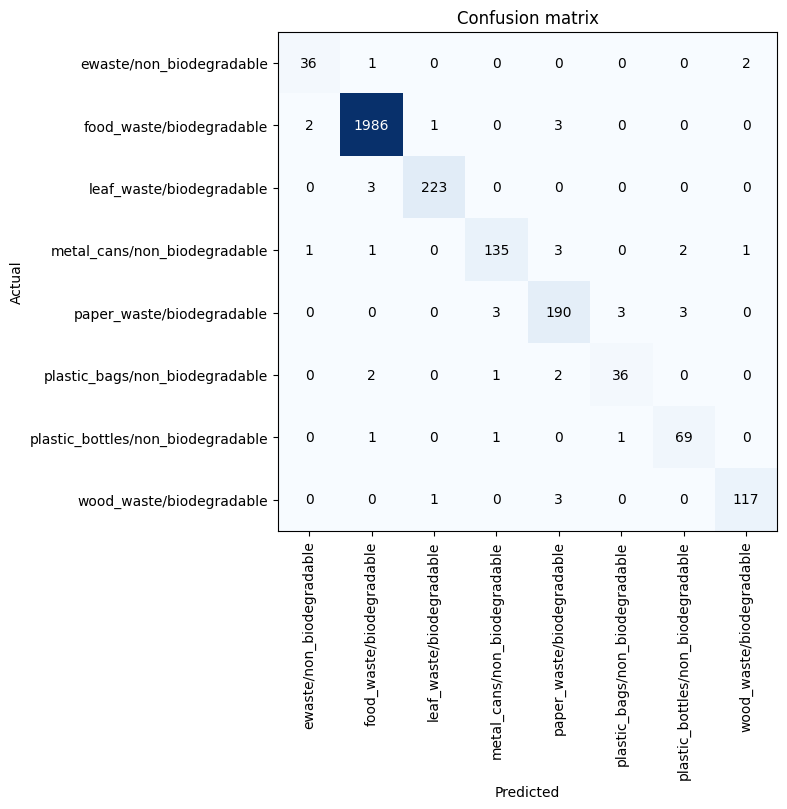

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (10,8))

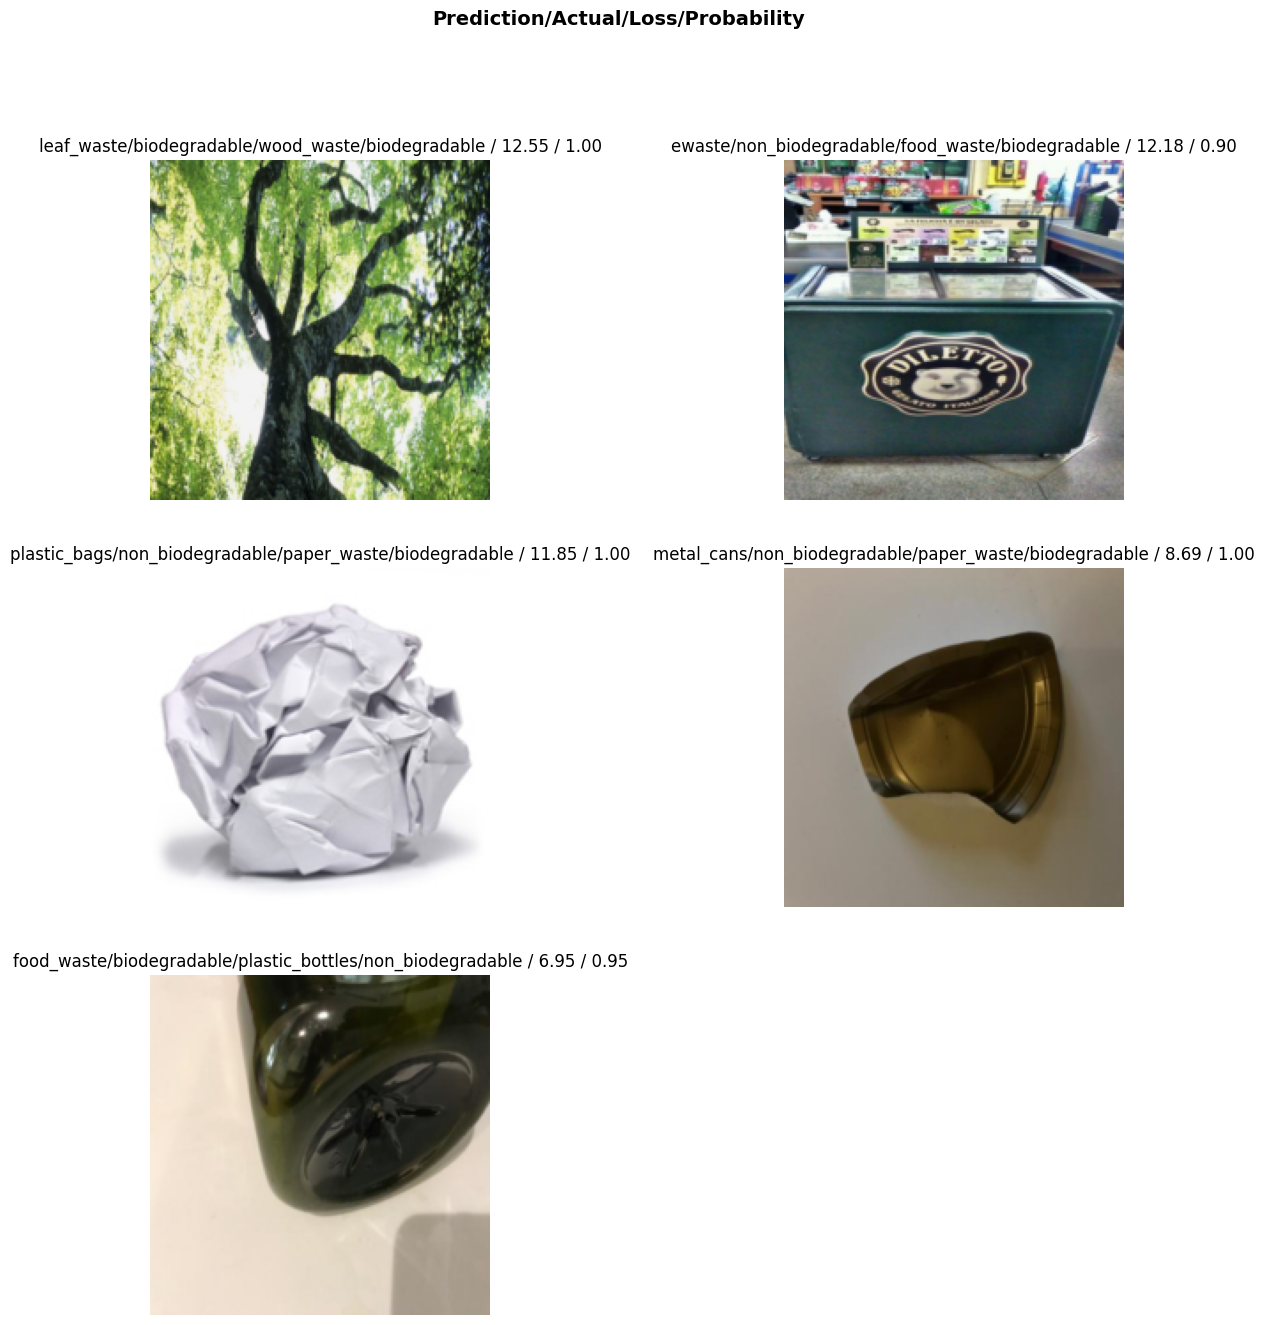

In [12]:
interp.plot_top_losses(5, figsize=(15, 15),ncols=2 ,
                       title='Top 5 Misclassified Images', 
                       )             

In [13]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,waste in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/waste)